Week1 :- Data Understanding and Problem setup

In [1]:
# Reading the Data
#Load the dataset into Python using Pandas and Numpy.
#Understand the structure of the dataset (e.g., columns, data types, and size).

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("supportTicketData.csv")

In [4]:
print(df.to_string())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
df.head()

,TicketID,Ticket detailed description,urgency-Priority
0,123456,connection issues with assigned address hi fac...,P1
1,123457,cannot access hi cannot access fallowing link ...,P2
2,123458,re address shown valid dear colleagues remarke...,P1
3,123459,sent tuesday critical alert following alert oc...,P2
4,123460,code spelling mistake hello should discover fo...,P2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19796 entries, 0 to 19795
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   TicketID                     19796 non-null  int64 
 1   Ticket detailed description  19796 non-null  object
 2   urgency-Priority             19796 non-null  object
dtypes: int64(1), object(2)
memory usage: 464.1+ KB


In [7]:
df.isna().sum()

TicketID                       0
Ticket detailed description    0
urgency-Priority               0
dtype: int64

In [9]:
#Defining the Problem Statement

#Problem: Can we predict the priority (P1/P2/P3) of a support ticket based on its textual description?
#Type of Problem: Multiclass Classification (target variable has multiple categories).
#Identifying the Target Variable

#the target variable is the priority column (e.g., P1/P2/P3).
#Ensure it's categorical.

In [11]:
target_variable = 'urgency-Priority'
print(df[target_variable].value_counts())

urgency-Priority
P3    7520
P1    6748
P2    5528
Name: count, dtype: int64


In [12]:
#Looking at the Distribution of the Target Variable

#Visualize the distribution of priorities to understand class imbalance.
#python
#Copy code


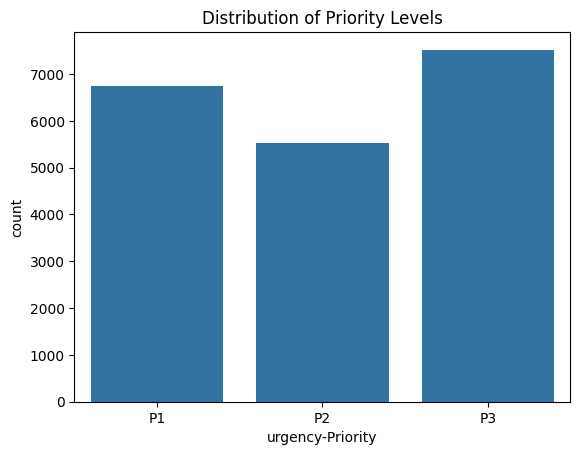

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=target_variable, data=df)
plt.title("Distribution of Priority Levels")
plt.show()

Week 2 :- Data Exploration and Preprocessing

5 . Basic Data Exploration

In [14]:
#Perform exploratory data analysis (EDA):
#Identify missing values.
#Analyze textual data length (e.g., number of words, characters).
#Visualize correlations between variables

In [18]:
# Check for missing values
print(df.isnull().sum())

TicketID                       0
Ticket detailed description    0
urgency-Priority               0
dtype: int64


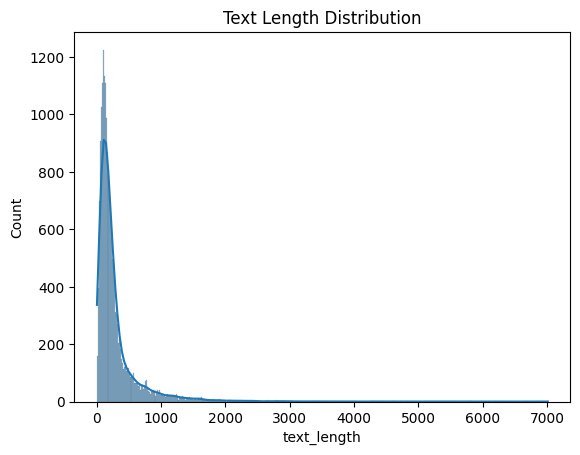

In [21]:
# Analyze text length
df['text_length'] = df['Ticket detailed description'].apply(len)
sns.histplot(df['text_length'], kde=True)
plt.title("Text Length Distribution")
plt.show()

Feature Engineering

In [22]:
#Create meaningful features like:
#Text length.
#Keyword presence (e.g., "urgent," "failure").
#Sentiment scores.
#Features extracted from timestamps (e.g., day, hour, weekday).

Visualize the exploratory data analysis

In [23]:
#@Use histograms and bar charts to explore data distributions.

<Axes: xlabel='text_length', ylabel='Count'>

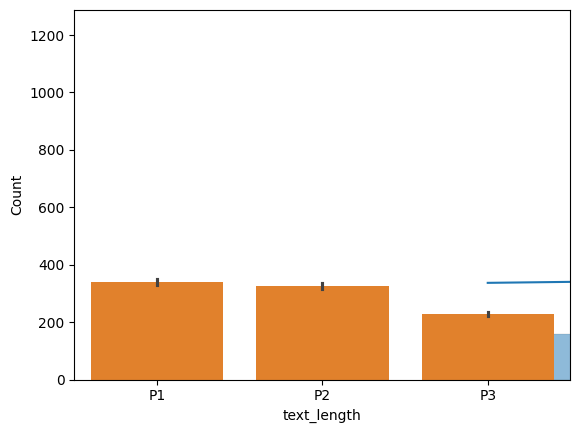

In [24]:
sns.histplot(df['text_length'], kde=True)
sns.barplot(x=target_variable, y='text_length', data=df)

Rejecting Useless Columns

In [25]:
#Drop columns that don't add value (e.g., ticket IDs)

In [27]:
df = df.drop(['TicketID'], axis=1)

Feature Selection Based On the Data Distribution

In [28]:
#Retain features with high variance or strong correlations with the target.

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [35]:
selected_features = SelectKBest(chi2, k=10).fit_transform(X, y)

ValueError: could not convert string to float: 'connection issues with assigned address hi facing connection issues number en tried changing cable switch with working ones works for colleagues machine still luck problem must be with address if change works can you please assist further thank you'

Week3 :- Cleaning and model Preparation

Outlier Treatment

In [36]:
#Use boxplots or Z-scores to identify and handle outliers.

In [37]:
from scipy.stats import zscore

df['zscore'] = zscore(df['text_length'])
df = df[df['zscore'].abs() < 3]  # Remove outliers

Missing Values Treatment

In [38]:
#Impute missing values using appropriate methods (mean, median, or mode).

In [42]:
df['text_length'].fillna(df['text_length'].median())

0         248
1         102
2        1017
3         290
4          86
         ... 
19791      66
19792      97
19793       4
19794      88
19795     101
Name: text_length, Length: 19413, dtype: int64

Visual Correlation Analysis

In [43]:
#Plot a heatmap to visualize correlations between numeric features.

In [44]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

ValueError: could not convert string to float: 'connection issues with assigned address hi facing connection issues number en tried changing cable switch with working ones works for colleagues machine still luck problem must be with address if change works can you please assist further thank you'